# IML Micro-Project 

## Gender Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering

In [2]:
# Loading the dataset into pandas dataframe

df=pd.read_csv('/kaggle/input/gender-classification-dataset/gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:

df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [5]:
# Descriptive statistics of the dataset
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Check the number of examples belonging to each class.

gender_count = df['gender'].value_counts()
gender_count

gender
Female    2501
Male      2500
Name: count, dtype: int64

## 1.2 Data Visualization

### Visualizing Gender Ratio

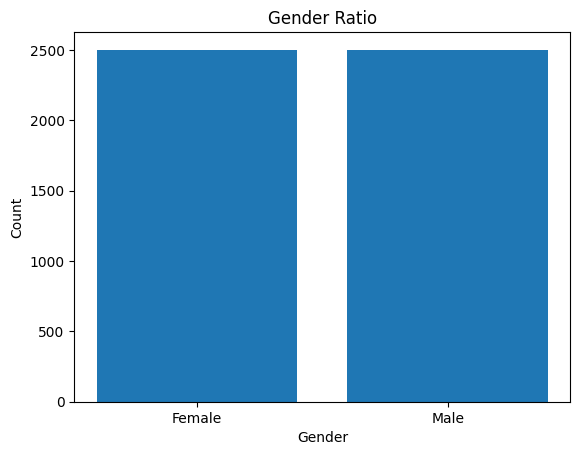

In [7]:

plt.bar(gender_count.index, gender_count.values)
plt.title("Gender Ratio")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [8]:
# Load the features to a variable X

X = df.iloc[:,:-1]
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [9]:
Y = df.iloc[:,-1]
Y

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4996    Female
4997    Female
4998    Female
4999    Female
5000      Male
Name: gender, Length: 5001, dtype: object

## Splitting the data into train and test

In [10]:
# Splitting the dataset into test data and train data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.40,random_state=1)

## Classification Models

### Logistic Regression

In [11]:
# Training with Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train,Y_train)

LogisticRegression()

In [12]:
prediction1=lr.predict(X_train)

# Computing Model Accuracy of train data for Logistic regression

from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(Y_train, prediction1) *100
print("Accuracy score with train dataset for Logistic Regression:",lr_acc)

Accuracy score with train dataset for Logistic Regression: 96.73333333333333


### KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [14]:
prediction2 = knn.predict(X_train)

# Computing Model Accuracy of train data for K Neighbor Classifier

from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(Y_train, prediction2) * 100
print("Accuracy score with train dataset for K Neighbors Classifier:",knn_acc)

Accuracy score with train dataset for K Neighbors Classifier: 97.6


### Support Vector Machine

In [15]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train)

SVC()

In [16]:
prediction3=svc.predict(X_train)

# Computing Model Accuracy of train data for Support Vector Machines
svm_acc = accuracy_score(Y_train, prediction3) * 100

print("Accuracy for with train dataset for Support Vector Machine:",svm_acc)

Accuracy for with train dataset for Support Vector Machine: 96.96666666666667


###  Final Result

In [17]:
print(lr_acc)
print(knn_acc)
print(svm_acc)

96.73333333333333
97.6
96.96666666666667


<Axes: >

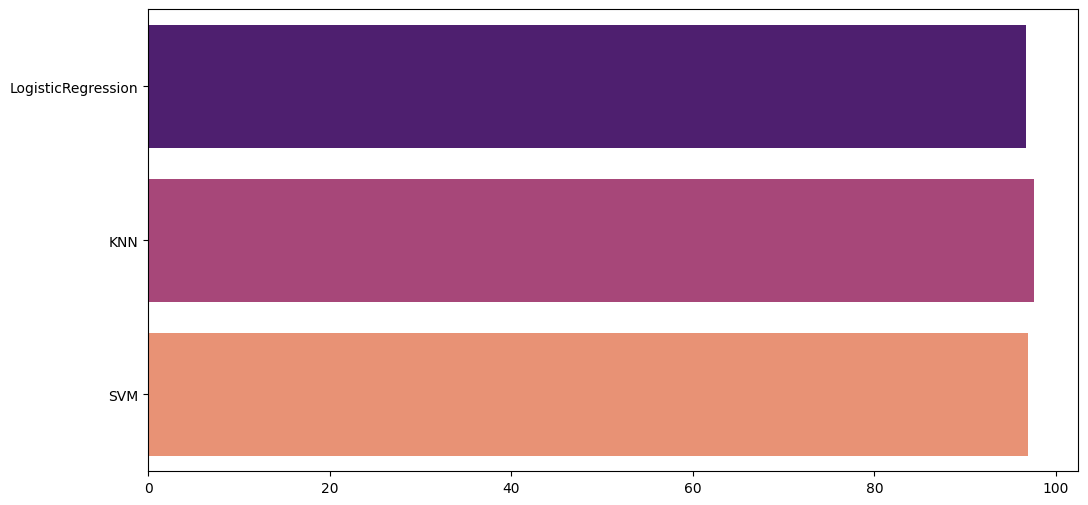

In [18]:
plt.figure(figsize=(12,6))
model_acc = [lr_acc,knn_acc,svm_acc]
model_name = ['LogisticRegression','KNN','SVM']
sns.barplot(x=model_acc, y=model_name,palette='magma')